  message: 'A termination event occurred.'
     nfev: 56
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x000002127D90D630>
   status: 1
  success: True
        t: array([0.00000000e+00, 2.82832899e-05, 3.11116189e-04, 3.13944518e-03,
       3.14227351e-02, 3.14255634e-01, 1.06058938e+00, 2.22188636e+00,
       4.15895918e+00, 6.33623381e+00])
 t_events: [array([6.33623381]), array([2.7939952])]
        y: array([[ 0.00000000e+00,  5.97646750e-04,  6.57356524e-03,
         6.62779269e-02,  6.57916020e-01,  6.10052110e+00,
         1.76432193e+01,  3.14572077e+01,  4.97860543e+01,
         6.41157720e+01],
       [ 2.11309131e+01,  2.11305601e+01,  2.11270311e+01,
         2.10918152e+01,  2.07469548e+01,  1.79056176e+01,
         1.35736705e+01,  1.06743281e+01,  8.24037743e+00,
         4.93588825e+00],
       [ 0.00000000e+00,  1.28165367e-03,  1.40965814e-02,
         1.42085158e-01,  1.40609179e+00,  1.26238480e+01,
         3.30428628e+01, 

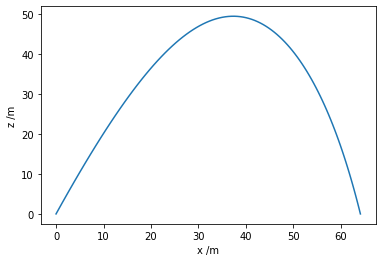

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Drag coefficient, projectile radius (m), area (m2) and mass (kg).
c = 0.47
r = 0.05
A = np.pi * r**2
m = 0.2
# Air density (kg.m-3), acceleration due to gravity (m.s-2).
rho_air = 1.28
g = 9.81
# For convenience, define  this constant.
k = 0.5 * c * rho_air * A

# Initial speed and launch angle (from the horizontal).
v0 = 50
phi0 = np.radians(65)

def deriv(t, u):
    x, xdot, z, zdot = u
    speed = np.hypot(xdot, zdot)
    xdotdot = -k/m * speed * xdot
    zdotdot = -k/m * speed * zdot - g
    return xdot, xdotdot, zdot, zdotdot

# Initial conditions: x0, v0_x, z0, v0_z.
u0 = 0, v0 * np.cos(phi0), 0., v0 * np.sin(phi0)
# Integrate up to tf unless we hit the target sooner.
t0, tf = 0, 50

def hit_target(t, u):
    # We've hit the target if the z-coordinate is 0.
    return u[2]
# Stop the integration when we hit the target.
hit_target.terminal = True
# We must be moving downwards (don't stop before we begin moving upwards!)
hit_target.direction = -1

def max_height(t, u):
    # The maximum height is obtained when the z-velocity is zero.
    return u[3]

soln = solve_ivp(deriv, (t0, tf), u0, dense_output=True,
                 events=(hit_target, max_height))
print(soln)
print('Time to target = {:.2f} s'.format(soln.t_events[0][0]))
print('Time to highest point = {:.2f} s'.format(soln.t_events[1][0]))

# A fine grid of time points from 0 until impact time.
t = np.linspace(0, soln.t_events[0][0], 100)

# Retrieve the solution for the time grid and plot the trajectory.
sol = soln.sol(t)
x, z = sol[0], sol[2]
print('Range to target, xmax = {:.2f} m'.format(x[-1]))
print('Maximum height, zmax = {:.2f} m'.format(max(z)))
plt.plot(x, z)
plt.xlabel('x /m')
plt.ylabel('z /m')
plt.show()